In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3    ## SQL Interface
import pickle     ## Used to save your data - Converts objects to byte stream and vice versa

from sklearn.feature_extraction.text import CountVectorizer  ## BOW Model
from sklearn.feature_extraction.text import TfidfVectorizer  ## TFIDF Model

from sklearn.manifold import TSNE    ## To visualize high dimensional data

## Modules to perform Text Preprocessing


In [2]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
conn = sqlite3.connect('mail.sqlite')

df= pd.read_sql_query("""SELECT * FROM mail""", conn)

df.head()

,level_0,index,mail,score,Cleanedmail
0,0,0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0,deat sun dec est michael subject queri wlodek ...
1,1,1,"discussion s - > np + np remind ago read , sou...",0,discuss remind ago read sourc forget critiqu n...
2,2,2,". . . 's much restrictive s - > np np . 's "" ""...",0,much restrict pro quit
3,3,3,""" listserv "" international conference 1992 sec...",0,listserv intern confer second circular februar...
4,4,4,anyone point book article causative constructi...,0,anyon point book articl causat construct korea...


In [4]:
df.drop(['index'],axis=1,inplace=True)

In [5]:
df.head()

,level_0,mail,score,Cleanedmail
0,0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0,deat sun dec est michael subject queri wlodek ...
1,1,"discussion s - > np + np remind ago read , sou...",0,discuss remind ago read sourc forget critiqu n...
2,2,". . . 's much restrictive s - > np np . 's "" ""...",0,much restrict pro quit
3,3,""" listserv "" international conference 1992 sec...",0,listserv intern confer second circular februar...
4,4,anyone point book article causative constructi...,0,anyon point book articl causat construct korea...


In [6]:
df.drop(['level_0'],axis=1,inplace=True)

In [7]:
df.head()

,mail,score,Cleanedmail
0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0,deat sun dec est michael subject queri wlodek ...
1,"discussion s - > np + np remind ago read , sou...",0,discuss remind ago read sourc forget critiqu n...
2,". . . 's much restrictive s - > np np . 's "" ""...",0,much restrict pro quit
3,""" listserv "" international conference 1992 sec...",0,listserv intern confer second circular februar...
4,anyone point book article causative constructi...,0,anyon point book articl causat construct korea...


In [8]:

df.shape

(962, 3)

## Shuffling

In [10]:
from sklearn.utils import shuffle

In [12]:
df = shuffle(df, random_state=69)
df.head()

,mail,score,Cleanedmail
544,"receive message error , please accept apology ...",1,receiv messag error pleas accept apolog great ...
780,dear friend : extremely important announcement...,1,dear friend extrem import announc iiiiiiiiiiii...
935,vacation ! most exotic place earth . . . . . ....,1,vacat exot place earth florida special onlin p...
662,"after read internet page , wonder interest = m...",1,read internet page wonder interest memor glasg...
271,critic manaster ramer miss main point : janhun...,0,critic manast ramer miss main point janhunen c...


# Using Binary BOW vector

In [13]:
bow_vect=CountVectorizer(binary=True)
bow = bow_vect.fit_transform(df['Cleanedmail'].values)

In [14]:
X=bow
y=df["score"].values

## Training and Testing

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False)


The optimal value of alpha is0.1


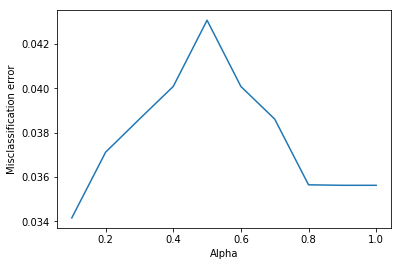

In [17]:
alpha= np.linspace(0.1,1,10)
cv_scores=[]

for a in alpha:
    clf=BernoulliNB(alpha=a)
    scores=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

MSE=[1 - x for x in cv_scores]

optimal_alpha= alpha[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is{}'.format(optimal_alpha))

plt.plot(alpha,MSE)
plt.xlabel('Alpha')
plt.ylabel('Misclassification error')
plt.show()
    

## Confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix


In [19]:
clf=BernoulliNB(alpha=optimal_alpha)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)
confusion_matrix(y_test,y_pred).T

96.8858131488


array([[120,   1],
       [  8, 160]], dtype=int64)

In [20]:
idx=(-clf.feature_log_prob_).argsort()[:2,:50]
print("top 50 words in SPAM")
for i in idx[0]:
    print(bow_vect.get_feature_names()[i])
print("\n******")
print("top 50 words in positive HAM")
for i in idx[1]:
    print(bow_vect.get_feature_names()[i])

top 50 words in SPAM
linguist
languag
univers
one
inform
includ
send
paper
edu
address
follow
english
interest
pleas
present
fax
research
discuss
http
call
confer
form
work
name
word
list
refer
general
develop
number
two
relat
first
www
differ
studi
point
email
contact
avail
post
case
theori
provid
thank
must
possibl
write
depart
intern

******
top 50 words in positive HAM
free
pleas
mail
list
address
receiv
com
one
remov
http
day
inform
send
call
want
offer
includ
email
need
order
money
best
name
check
internet
today
work
site
www
everi
first
mani
week
busi
start
follow
messag
number
servic
click
program
market
cost
state
month
product
even
thank
subject
interest
